<font size="6"> 
 Thipens company report: 
    
 Solutions for Solita to phase out its coal power plant
</font>



**Author:** *Paolo Thiran (Chief technical officer)*
            *Gauthier Limpens (Project manager)*


# Introduction:




## Context

Solita is a city in the south of Spain. The city is searching for new opportunities as the power plant they owned has reached its lifetime and will be dismantled soon. Moreover, the power plant was fueled with coal and was not compatible with the region legislation to reduce greenhouse gas emissions. 

From a demand side, the city has a yearly electricity consumption of 394.2 GWh/y and forecast a constant demand.

The city started to investigate three different options: (1) import all the electricity from abroad (thourhg the grid), (2) produce locally electricity with photovoltaic, (3) and produce electricity with the concentrated solar panel (CSP) technology. 

The Thipens consulting company has been hired to perform the studies (1) and (2). An independent study will be conducted to perform the potential of (3).

### Objectives:

The city wants to compare the different options in terms of cost, direct emissions and security of supply indicators. The different criteria will be explained later when appropriated.

### Main findings (results):
The main outcomes of our study are:

|                          | **Yearly cost** | **LCOE** | **Yearly emissions** | **Auto-sufficiency** |
|:------------------------:|:---------------:|----------|:--------------------:|:--------------------:|
|          [Units]         |      [M€/y]     | [€/MWh]  |       [ktCO2/y]      |          [%]         |
|     Coal power plant     |        /        | 40.2     |          491         |          100         |
|     Import from grid     |       25.8      | 52.6     |         98.3         |           0          |
|       Photovoltaic       |       25.0      | 50.9     |         78.5         |          31          |
| Photovoltaic + batteries |       24.9      | 50.7     |         71.2         |          43          |

Details of the criteria:
- **Yearly cost**: (in M€) It represents the total cost of the system (CAPEX and OPEX)reported to a given year (the approach is simplified and neglect a discount rate). As the coal power plant is amortised, no data is given.
- **Yearly emissions**: (in MtCO2_eq) It represents the amount of greenhouse gas emissions related to the operation of the system. It is calculated based on the amount of resources used. For the imported electricity, the average mix of the region is taken (200 kg_CO2_eq/MWh). For PV and batteries, emissions are related to their constructions.  
- **Auto sufficiency**: (%) It represents the amount of electricity which is locally produced. 

Thus, a compromise between PV and batteries appeared as the best trade-off between cost, emissions and auto-sufficiency of the system.

### Constraints:
The city would like to own the future installation, it plans to install it where the current power plant is. The area is large flat plain, and they have 2 km2 of lands. 

### Data:
The city has collected several data for the year 2005.
These data is representative of what could happen in the future.

**Electricity related data:**
- Hourly electricity consumption (MW)
- Hourly electricity market price (buy) (€/MWh)
- Hourly electricity market price (sell) (€/MWh

**Meteorological data:**
- Hourly irradiance GHI (W/m2)
- Hourly irradiance DNI (W/m2)
- Hourly irradiance DHI (W/m2)
- Temperature (dry bulb) [Celsius]
- Wind direction [deg]
- Wind speed [m/s]


**From a real PV installation with well oriented panels (10kW peak):**
- Hourly PV production (kW)


## Data preparation
In this section, the given data will be loaded, and the relevant one will be kept.

Then, the data will be visualised and analysed for a given week.

But first of all, let's import some useful packages:

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Import data:
- Electricity related data: Solita_time_electricity.csv
- Meteorological data: Solita_time_weather.csv
- Real PV installation with well oriented panels (10kW peak): Solita_pv_prod.csv

**/!\ to load the file locally, change the path adress with your adress.**

In [2]:

#Change by your local adress


# To run the code, replace the path were the data are here:
filename_ts_electricity = 'C:/Users/glimpens/Nextcloud/GL/Cours/LENVI2007/APP_CSP/Code/Datasets/Solita_time_electricity.csv'
filename_ts_weather = 'C:/Users/glimpens/Nextcloud/GL/Cours/LENVI2007/APP_CSP/Code/Datasets/Solita_time_weather.csv'
filename_ts_pv_prod = 'C:/Users/glimpens/Nextcloud/GL/Cours/LENVI2007/APP_CSP/Code/Datasets/Solita_pv_prod.csv'

ts_electricity = pd.read_csv(filename_ts_electricity,delimiter = ',')
ts_weather = pd.read_csv(filename_ts_weather,delimiter = ',')
ts_pv_prod = pd.read_csv(filename_ts_pv_prod,delimiter = ',')


df_elec = pd.DataFrame(ts_electricity)
df_weather = pd.DataFrame(ts_weather)
df_pv_prod = pd.DataFrame(ts_pv_prod)


### Check data
Select a week on which to plot the data:

In [3]:
week = 12

time = np.arange(8760)
time_week = np.arange(7*24)+(week-1)*7*24 + 3 * 24 #The first day of the year 2005 is a Thursday (3 days after monday).

elec_price_buy = df_elec.iloc[time,1] # €/MW
elec_price_sell = df_elec.iloc[time,2] # €/MW
elec_demand = df_elec.iloc[time,3] # €/MW
pv_prod = df_pv_prod.iloc[time,1] # €/MW
c_p_t = pv_prod / 10. # Adimensionnalised PV production [%]



The uploaded data are illustrated hereafter:
By analysing the sun time series (related to the PV), we can later depict what happends in the elec demand and in the market price.

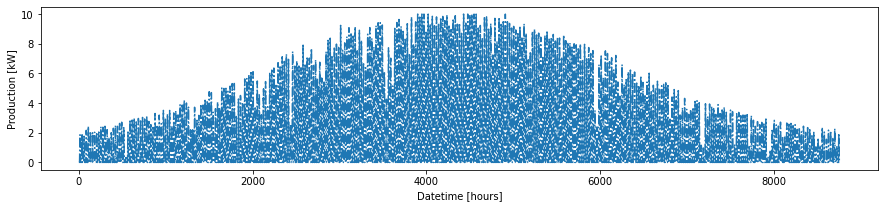

In [4]:
plt.figure(figsize=(15,3))
#plt.plot(time_week,pv_prod.loc[time_week],'-.',label='PV production (buy)')
plt.plot(time,pv_prod,'-.')
plt.ylabel('Production [kW]')
plt.xlabel('Datetime [hours]')
plt.show()


The choosen week (12th of the year) is a sunny week with one cloudy day (Friday). It is the beginning of April, thus the panels are not at their full capacity (peaks at 6 kW), a summer week can reach higher power (better orientation). 

The following graph shows the electricity demand for the same week:

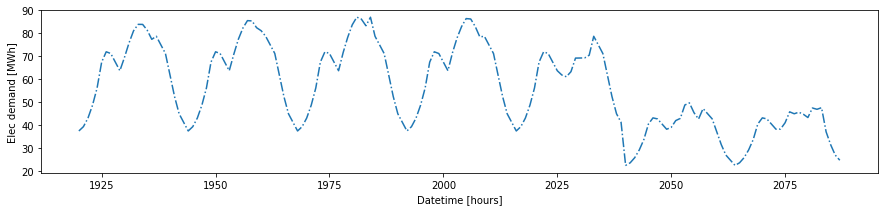

In [5]:
plt.figure(figsize=(15,3))
plt.plot(time_week,elec_demand.loc[time_week],'-.')
plt.ylabel('Elec demand [MWh]')
plt.xlabel('Datetime [hours]')
plt.show()

There are two patterns in the electricity demand : the day/night and the week/weekend. The electricity consumption is higher during the day than the night and the week than the weekend. This is due to human activities (work, services ...). On top of that, we can see a little elecrticity peak demand during the 'hot hours', which are from 1pm-5pm. Indeed, at that hours, during the sunny days (Monday-Thursday), some air conditioning is used and increases significatively the electricity demand.

The last hourly component of our system is the market prices from the high voltage grid:

<function matplotlib.pyplot.show(close=None, block=None)>

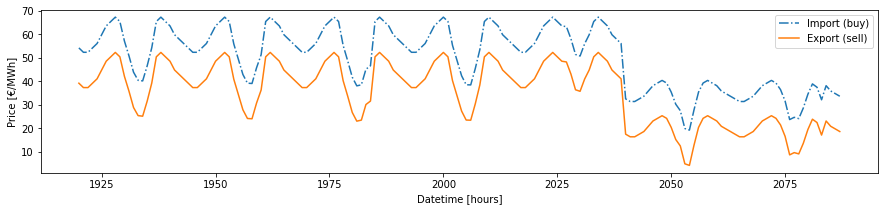

In [6]:
plt.figure(figsize=(15,3))
plt.plot(time_week,elec_price_buy.loc[time_week],'-.',label='Import (buy)')
plt.plot(time_week,elec_price_sell.loc[time_week],'-',label='Export (sell)')
plt.ylabel('Price [€/MWh]')
plt.xlabel('Datetime [hours]')
plt.legend()
plt.show

A similar pattern can be observed: night is cheaper than daytime, and weekends days are cheaper than week days. The solar peak has an influence on the PV production, and this is expected to decrease the market price during these hours. Indeed, PV has almost a null marginal production cost, thus its selling value on the market is near 0. 

Finally, let's calculate some main indicators, which are : 
- c_p : average load factor [%]
- Elec_demand_yearly: yearly electricity demand [MWh]
- Elec_price_buy : average market price to buy [€/MWh]
- Elec_price_sell : average market price to sell [€/MWh]

In [7]:
c_p = np.average(pv_prod) / np.max(pv_prod)
Elec_demand_yearly = np.sum(elec_demand)
Elec_price_buy = np.average(elec_price_buy)
Elec_price_sell = np.average(elec_price_sell)

print('Capacity factor :',c_p*100.,' [%]')
print('Yearly electricity demand : ',Elec_demand_yearly/1000.,' [GWh]')
print('Average market price to buy: ',Elec_price_buy,' [€/MWh]')
print('Average market price to sell: ',Elec_price_sell,' [€/MWh]')

Capacity factor : 17.425434800910775  [%]
Yearly electricity demand :  491.33477058548016  [GWh]
Average market price to buy:  50.5625527157401  [€/MWh]
Average market price to sell:  35.56777306113747  [€/MWh]


**Conclusion** : 
The photovoltaic potential is high in this region (load factor of 17.4%). An adequacy analysis is required to assess the real potential of PV compared to its demand.

# Solution 1 : all import from the grid

The first solution we propose is to import all the electricity from the high voltage grid. Knowing the electricity price and the electricity demand, the calculation is straight forward:

In [8]:
import_cost = np.sum(elec_demand * elec_price_buy)

print('average elec price: ',Elec_price_buy,'[€/MWh]')
print('Yearly cost for imports: ',import_cost/1000000.,' [M€]') # €/week
print('Elec needed: ',np.sum(elec_demand),' [MWh]') # MWh/week
print('average price: ',import_cost/np.sum(elec_demand),' [€/MWh]') # €/MWh

average elec price:  50.5625527157401 [€/MWh]
Yearly cost for imports:  25.84167150516848  [M€]
Elec needed:  491334.77058548015  [MWh]
average price:  52.59483564408692  [€/MWh]


To cover the yearly electricity demand (491 GWh) by imports from the high voltage grid, the electricity bill is 25.8 million euros every year. This gives in average an electricity cost of 52.6€/MWh which is more expensive than the average price. Thus, it means that more electricity is consumed when the price is high than the opposite (day/night effect).

The other indicators for this solution are : 
- Average emissions of electricity from the grid: 200 kg/MWh
- Autosufficiency : relying from the grid implies no auto-sufficiency.


In [9]:
gwp_grid = 200

gwp_sol_1 = np.sum(elec_demand) * gwp_grid

print('gwp from electricity imported from the grid: ',gwp_sol_1/1000000,' [ktCO2_eq/y]')


gwp from electricity imported from the grid:  98.26695411709603  [ktCO2_eq/y]


The solution is at an average electricity cost of 52.6€/MWh and emits 98 kt of CO2 equivalent per year.

# Solution 2: PV integration

Thank to the data received, no meteorological analysis is required from the irradiance. The time series received already account for the solar angle (from horizon to sun in the sky) and the technology conversion efficiency. 

## LCOE of PV
Technical caracteristics for an utility scale installation : 
- pannel peak production 270 W/m2
- In average only 33% of the surface can be covered with panels (to avoid shadow and have roads between rows)
- pannel and installation cost (per pannel): 200€/m2
- converter : 200€/kW
- lifetime panels and converter: 20 years
- maintenance cost of pannel and converter : 10€/kW/y
- gwp : 2000 kg_CO2_eq / kW

(technical data from https://pdf.archiexpo.com/pdf/bisol/polycrystalline-pv-module-datasheet/66976-63371.html, no source for the financial ones)

What is the average production price (simplified LCOE):


In [10]:
# data for pv:
pv_lifetime = 20
c_inv_m2 = 200
c_inv_inverter = 200
c_maint_kW = 10
pv_gwp = 2000 #kg_CO2_eq / kW

pv_m2_to_kW = 1. / 0.27
pv_inv_cost = c_inv_m2 * pv_m2_to_kW + c_inv_inverter# €/kW

pv_prod_yearly = c_p * pv_lifetime * 8760. / 1000. # MWh
pv_total_cost = pv_inv_cost + c_maint_kW * pv_lifetime

lcoe_pv = pv_total_cost / pv_prod_yearly

lcoe_pv


37.36536483435513

The LCOE is around 31€/MWh which is much lower than the average electricity price from the market. We expect that a PV installation is interesting at Solita, and that it could save up to 10.5M€ per year to the city!


## System cost parametric analysis (PV capacity installed)
How much PV can we install ? We need to define a simple model and a function to compute the key performance indicators:

In [11]:
def my_simple_model(F_PV , c_p_t , ts_demand):
    """
    This function calculates the power balance for a simple model with just PV panels 
    Arguments:
        input_data: Time series of input observations as a list, NumPy array or pandas series
        n_lag: number of previous time steps to use for training, a.k.a. time-lag        
    Returns:
        time series of imports (ts_import), exports (ts_export) and PV production (pv_prodd) 
    """
    pv_prodd = F_PV * c_p_t
    
    ts_import = ts_demand - pv_prodd # np.max(np.zeros(ts_demand.size()) , ts_demand - F_PV * ts_irr)
    ts_import.loc[ts_import<0.] = 0. 
    
    ts_export = F_PV * c_p_t - ts_demand
    ts_export.loc[ts_export<0.] = 0.  
    
    return ts_import, ts_export, pv_prodd

def kpis_calculation(elec_demand, elec_price_buy, elec_price_sell, ts_import, ts_export, pv_prodd):
    """
    This function calculates the key outputs indicator for 
    Arguments:
        aaa
    Returns: 
        cost_import, cost_sell
    """
    
    # Aggregate time series over the year:
    
    cost_import = np.sum(elec_price_buy * ts_import)
    cost_export = np.sum(elec_price_sell * ts_export)
        
    auto_consumption = 1. - (np.sum(ts_export) / max(np.sum(pv_prodd),0.0001)) # the max is in case there is no pv_prod
    auto_sufficiency = 1. - (np.sum(ts_import) / np.sum(elec_demand))

    return cost_import, cost_export, auto_consumption, auto_sufficiency


In [12]:
#Calculation of the maximum capacity installable:
land_available = 2000000.
coverage = 0.33;

P_max = land_available * coverage / pv_m2_to_kW / 1000 # MW


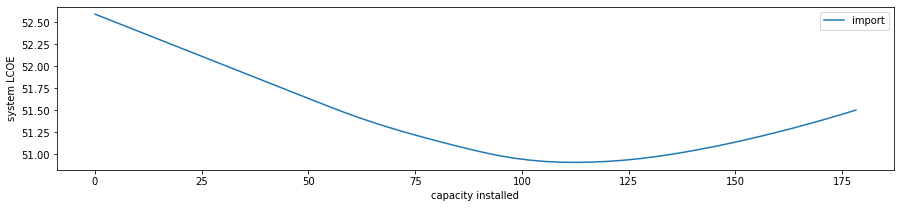

In [13]:
# Estimation of the cost for different PV capacity installed:

# resolution
n_points = 50;

# Memory allocation:
c_imp = np.zeros((n_points,1))
c_exp = np.zeros((n_points,1))
autocons = np.zeros((n_points,1))
autosuff = np.zeros((n_points,1))
lcoe_average = np.zeros((n_points,1))
total_cost = np.zeros((n_points,1))

Capa_pv = np.linspace(0.,P_max,n_points)

for ii in range(n_points): # Units of f_pv MW ?
    capa_pv = Capa_pv[ii] # MW
    #print(f_pv)
    (ts_imp, ts_exp, pv_production) = my_simple_model(capa_pv, c_p_t, elec_demand)
    (cost_import, cost_export, auto_consumption, auto_sufficiency) = kpis_calculation(elec_demand, elec_price_buy, elec_price_sell, ts_imp, ts_exp, pv_production)
    
    year_cost_pv = capa_pv * pv_total_cost / pv_lifetime * 1000 #€ pv_inv_cost is in €/kW
    
    tot_cost = year_cost_pv + cost_import - cost_export
    lcoe_pv_integrated = tot_cost / Elec_demand_yearly
    
    # print('PV [MW]',capa_pv,'year_cost_pv',year_cost_pv/1000000.,'cost_import',cost_import/1000000.,'cost_export',-cost_export/1000000.)
    
    # print('PV prod [MWh]',capa_pv * c_p * 8760)
    
       
    c_imp [ii] = cost_import
    c_exp [ii] = cost_export
    autocons [ii] = auto_consumption
    autosuff [ii] = auto_sufficiency
    lcoe_average [ii] = lcoe_pv_integrated
    total_cost [ii] = tot_cost
    

plt.figure(figsize=(15,3))
plt.plot(Capa_pv,lcoe_average,'-',label='import')
plt.ylabel('system LCOE')
plt.xlabel('capacity installed')
plt.legend()
plt.show()

    

The average LCOE of the system first reduces when installing PV and then increase again. The LCOE starts at the 52.6€, the price obtained when importing all from the grid. Then, it drops until 51€/MWh. In that case, the electricity used is a mix of PV installed and electricity import. Then, it increases. To further go into the details, let's focus in the case which appears as the optimal : 110MW of caacity installed.

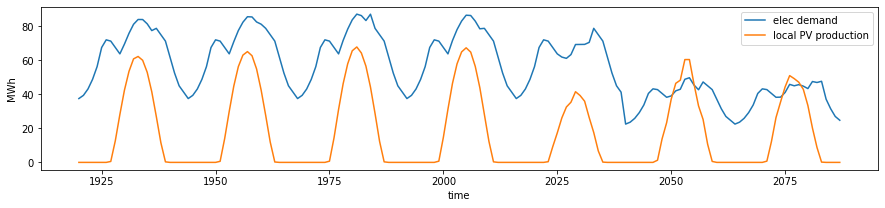

In [14]:
capa_pv = 110 # MW seems the optimum 

(ts_imp, ts_exp, pv_production) = my_simple_model(capa_pv, c_p_t, elec_demand)
(cost_import, cost_export, auto_consumption, auto_sufficiency) = kpis_calculation(elec_demand, elec_price_buy, elec_price_sell, ts_imp, ts_exp, pv_production)
    
year_cost_pv = capa_pv * pv_total_cost / pv_lifetime * 1000 #€ pv_inv_cost is in €/kW    
tot_cost = year_cost_pv + cost_import - cost_export
lcoe_pv_integrated = tot_cost / Elec_demand_yearly 
    
plt.figure(figsize=(15,3))
plt.plot(time_week,elec_demand.loc[time_week],'-',label='elec demand')
plt.plot(time_week,pv_production.loc[time_week],'-',label='local PV production')
plt.ylabel('MWh')
plt.xlabel('time')
plt.legend()
plt.show()    

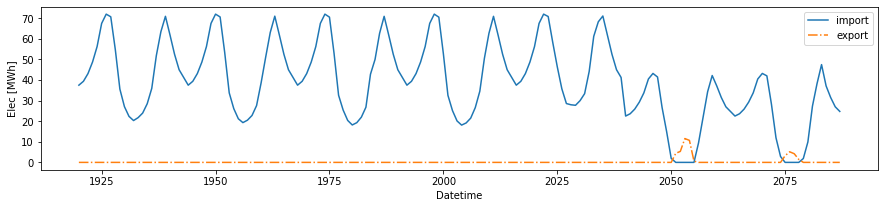

In [15]:
plt.figure(figsize=(15,3))
plt.plot(time_week,ts_imp.loc[time_week],'-',label='import')
plt.plot(time_week,ts_exp.loc[time_week],'-.',label='export')
plt.ylabel('Elec [MWh]')
plt.xlabel('Datetime')
plt.legend()
plt.show()

The optimum is reached when the maximum capacity of PV is installed without exporting to the grid. Indeed, if we look at the time when we could export (see graph after):

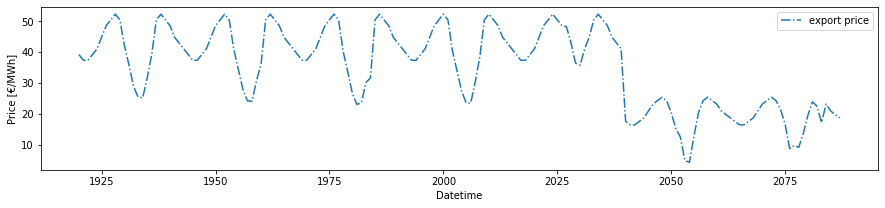

In [16]:
plt.figure(figsize=(15,3))
plt.plot(time_week,elec_price_sell.loc[time_week],'-.',label='export price')
plt.ylabel('Price [€/MWh]')
plt.xlabel('Datetime')
plt.legend()
plt.show()

we see that exporting is at a cost which is in average lower than the LCOE of the technology. In other words, selling the electricity to the grid gives less money as the one required to finance the installation.

The system performances are:


In [17]:

# Global warming potential of PV:
gwp_tot = pv_gwp * capa_pv * 1000 # kg_CO2_eq / MW

gwp_spec = gwp_tot / (np.sum(pv_production) * pv_lifetime) # kg_CO2 / MWh

gwp_sol_2 = gwp_tot / pv_lifetime + np.sum(ts_imp) * gwp_grid

print(gwp_spec)
print(gwp_sol_2/1000000.)

# System cost:

print(tot_cost/1000000.)
print(lcoe_pv_integrated)

# Auto-sufficiency:
print(auto_consumption)
print(auto_sufficiency)


65.51070457971352
78.50385400076979
25.011822449905523
50.90586693081206
0.9160510743985448
0.3130564124300481


**Performances:**  
- **Cost** : The yearly system cost is 25 M€, which represents 0.8 M€ of savings per year. In other words, the LCOE of the electricity drops to 50.9 €/MWh.
- **GWP** : The yearly system emissions are 78.5 ktCO2_eq, which represents a drop of 19.8 ktCO2 compared to the reference scenario. Even if the emissions related to the production with PV are not zero (66 kgCO2_eq/MWh), there are smaller than the one from the grid
- **Energy security** : The system imports 69% of its electricity from the grid and consumes 92% of its own electricity production. 

The transmission system operator (<=> the operator of the high voltage grid) encourage the cities to avoid exporting peaks of electricity. Indeed, if everyone is exporting at the same time, the grid will be saturated. Thus, we perform a last analysis where a battery capacity will be deployed in order to reduce the peaks of electricity exported and increase the auto-consumption of the system.

# Solution 2bis : PV system with batteries
After a market tender, the best offer had the following characteristics:
- c_inv batteries = 40 000€/MWh (2nd hand batteries)
- Efficiency_in = efficiency_out = 95%
- Energy to power ratio : 4 [h]
- self discharge = 0.01 [%]
- Lifetime : 15 years
- gwp_construction = 0 [€/MWh] (2nd hand batteries)

We are interested in oversizing the PV capacity to 150 MW peak.


In [18]:
def my_2nd_simple_model(F_PV , F_batt, batt_eff_in, batt_eff_out, self_disch, E2P, c_p_t , ts_demand):
    """
    This function calculates the power balance for a simple model with just PV panels. 
    To simplify the model, we assume that the battery is empty at the first hour.
    Arguments:
        input_data: Time series of input observations as a list, NumPy array or pandas series
        n_lag: number of previous time steps to use for training, a.k.a. time-lag        
    Returns:
        time series of imports (ts_import) and exports (ts_export) 
    """
    pv_prod = F_PV * c_p_t
    
    # Allocate memory:
    ts_import = ts_demand* 0.
    ts_export = ts_demand* 0.
    batt_in = ts_demand* 0.
    batt_out = ts_demand* 0.
    batt_level = ts_demand* 0. # initial level of charge : 0 MWh
    
    for i in time:
        residual_demand = ts_demand[i] - pv_prod[i]
        
        if residual_demand > 0:
            # We 1st use the battery:
            batt_out [i] = min(min(residual_demand/batt_eff_out,batt_level[i]),F_batt / E2P )
            batt_level[i+1] = batt_level[i] * (1. - self_disch) - batt_out [i]
            residual_demand -= batt_out [i]*batt_eff_out
            #2nd we use the grid:
            ts_import[i] = residual_demand
        else:
            # 1st we charge the battery:
            batt_in [i] = min(min(-residual_demand*batt_eff_in,F_batt - batt_level[i]), F_batt / E2P) # Warning sign)
            batt_level[i+1] = batt_level[i] * (1. - self_disch) + batt_in [i]
            residual_demand += batt_in [i] / batt_eff_in
            # 2nd we export to the grid:
            ts_export[i] = - residual_demand
  
    batt_level = batt_level[time] # remove last hour
    
    return ts_import, ts_export, pv_prod, batt_in, batt_out, batt_level


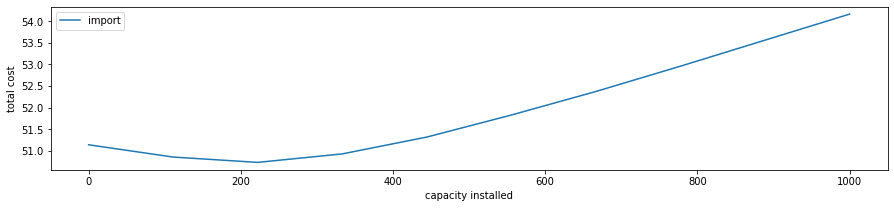

In [19]:
# Test my new function

# Technical data of batteries:
batt_eff_in = 0.9
batt_eff_out = 0.9
energy_to_power_ratio = 4 # not accounted now
c_maint_batt = 2 # €/MWh/y
c_inv_batt = 40000 # €/MWh
EtoP = 4 # hours
self_discharge = 0.001
batt_lifetime = 15

# Estimation of the cost for different PV capacity installed:
Capa_max_batt = 1000.; # MWh
n_points = 10
capa_pv = 150.


# Memory allocation:
c_imp = np.zeros((n_points,1))
c_exp = np.zeros((n_points,1))
autocons = np.zeros((n_points,1))
autosuff = np.zeros((n_points,1))
lcoe_average = np.zeros((n_points,1))
total_cost = np.zeros((n_points,1))

Capa_batt = np.linspace(0.,Capa_max_batt,n_points)

for ii in range(n_points): # Units of f_pv MW ?
    capa_batt = Capa_batt[ii]
    #print(f_pv)
    (ts_imp, ts_exp, pv_prod, batt_in, batt_out, batt_level) = my_2nd_simple_model(capa_pv , capa_batt, batt_eff_in, batt_eff_out, self_discharge, EtoP, c_p_t , elec_demand)
    (cost_import, cost_export, auto_consumption, auto_sufficiency) = kpis_calculation(elec_demand, elec_price_buy, elec_price_sell, ts_imp, ts_exp, pv_prod)
    
    year_cost_pv = capa_pv * pv_total_cost / pv_lifetime * 1000 #€ pv_inv_cost is in €/kW
    year_cost_batt = capa_batt * (c_inv_batt + c_maint_batt * batt_lifetime) / (batt_lifetime)
    
    tot_cost = year_cost_pv + year_cost_batt + cost_import - cost_export
    lcoe_pv_integrated = tot_cost / Elec_demand_yearly
    
    c_imp [ii] = cost_import
    c_exp [ii] = cost_export
    autocons [ii] = auto_consumption * 100.
    autosuff [ii] = auto_sufficiency * 100.
    lcoe_average [ii] = lcoe_pv_integrated
    total_cost [ii] = tot_cost

    
plt.figure(figsize=(15,3))
plt.plot(Capa_batt,lcoe_average,'-',label='import')
plt.ylabel('total cost')
plt.xlabel('capacity installed')
plt.legend()
plt.show()

Installing up to 230 MW of batteries for a 150MW of installed PV capacity can reduce slightly the cost. Then the system cost soars.

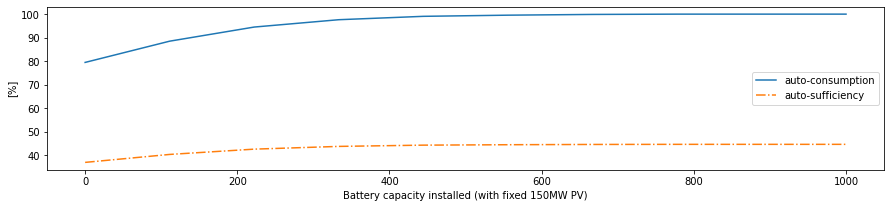

In [20]:
plt.figure(figsize=(15,3))
plt.plot(Capa_batt,autocons,'-',label='auto-consumption')
plt.plot(Capa_batt,autosuff,'-.',label='auto-sufficiency')
plt.ylabel('[%]')
plt.xlabel('Battery capacity installed (with fixed 150MW PV)')
plt.legend()
plt.show()

The main advantage in installing batteries is to increase the auto-sufficiency of the system. Moreover, with 200 MWh of installed capacity, most of the PV production is consumed locally, indeed the auto-consumption reaches 90% and increase even more if more batteries are installed.

Let's focus on the optimal case with 230 MWh of batteries & 150 MW of PV:

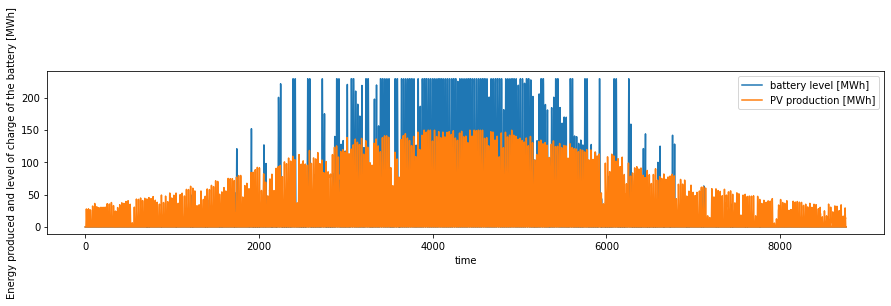

In [21]:
capa_pv = 150.
capa_batt = 230.
(ts_imp, ts_exp, pv_prod, batt_in, batt_out, batt_level) = my_2nd_simple_model(capa_pv , capa_batt, batt_eff_in, batt_eff_out, self_discharge, EtoP, c_p_t , elec_demand)
(cost_import, cost_export, auto_consumption, auto_sufficiency) = kpis_calculation(elec_demand, elec_price_buy, elec_price_sell, ts_imp, ts_exp, pv_prod)
        
year_cost_pv = capa_pv * pv_total_cost / pv_lifetime * 1000 #€ pv_inv_cost is in €/kW
year_cost_batt = capa_batt * (c_inv_batt + c_maint_batt * batt_lifetime) / (batt_lifetime)
    
tot_cost = year_cost_pv + year_cost_batt + cost_import - cost_export
lcoe_pv_integrated = tot_cost / Elec_demand_yearly
     
    
    
plt.figure(figsize=(15,3))
plt.plot(time,batt_level,'-',label='battery level [MWh]')
plt.plot(time,pv_prod,'-',label='PV production [MWh]')
plt.ylabel('Energy produced and level of charge of the battery [MWh]')
plt.xlabel('time')
plt.legend()
plt.show()

Unsurprinsinlgy, the batteries are most used in summer, and less in winter where the PV production is directly consumed. Let's look at a specific week:

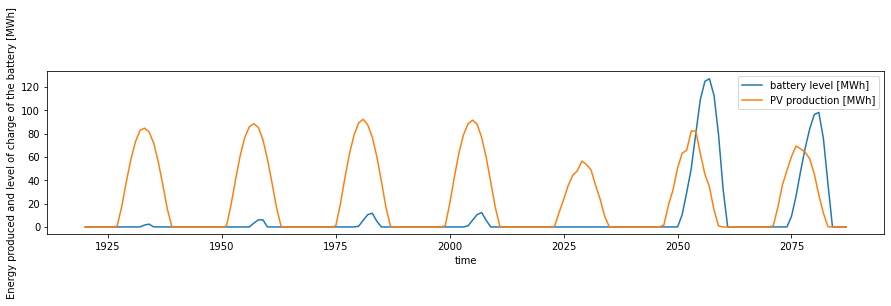

In [22]:
plt.figure(figsize=(15,3))
plt.plot(time_week,batt_level.loc[time_week],'-',label='battery level [MWh]')
plt.plot(time_week,pv_prod.loc[time_week],'-',label='PV production [MWh]')
plt.ylabel('Energy produced and level of charge of the battery [MWh]')
plt.xlabel('time')
plt.legend()
plt.show()

This week being in April, the PV production is low and the battery cannot perform a full cycle. Let's check what happends for a summer week : 

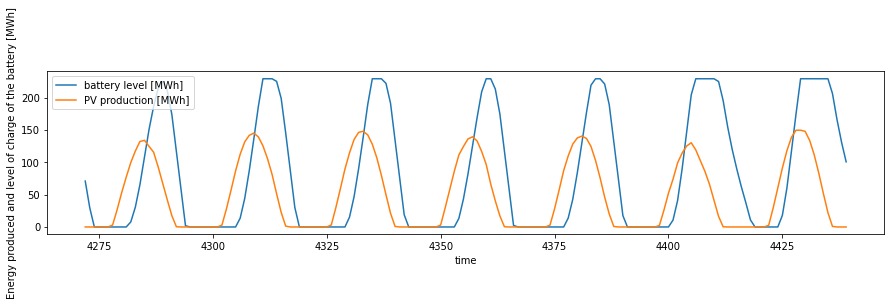

In [23]:
week = 26

time_week_summer = np.arange(7*24)+(week-1)*7*24 + 3 * 24

plt.figure(figsize=(15,3))
plt.plot(time_week_summer,batt_level.loc[time_week_summer],'-',label='battery level [MWh]')
plt.plot(time_week_summer,pv_prod.loc[time_week_summer],'-',label='PV production [MWh]')
plt.ylabel('Energy produced and level of charge of the battery [MWh]')
plt.xlabel('time')
plt.legend()
plt.show()

The battery is fully charged and supplies a part of the electricity consumption during the night.

Computation of the indicators:

In [24]:

# Global warming potential of PV:
gwp_tot = pv_gwp * capa_pv * 1000 # kg_CO2_eq / MW

gwp_sol_2bis = gwp_tot / pv_lifetime + np.sum(ts_imp) * gwp_grid

print(gwp_sol_2bis/1000000.) # ktCO2eq/y

# System cost:
print(tot_cost/1000000.)
print(lcoe_pv_integrated)

# Auto-sufficiency:
print(auto_consumption)
print(auto_sufficiency)


71.21508443444225
24.924723782811043
50.728597434922946
0.9484053592389964
0.4279350068441553


We performed an analysis of a PV + battery system to supply Solita. Arbitrary, the PV capacity has been increased to 150 MW (+40MW compared to the optimal solution). The optimal capacity of batteries appear to be 230 MWh which reduces slightly the cost of the system but increases significatively its self consumption.

**Performances:**  
- **Cost** : The yearly system cost is 24.9 M€, which represents 0.8 M€ of savings per year. In other words, the LCOE of the electricity drops to 50.7 €/MWh.
- **GWP** : The yearly system emissions are 71.2 ktCO2_eq. This does not account for the emissions related to the construction of the battery.
- **Energy security** : The system imports 57% of its electricity from the grid and consumes 95% of its own electricity production. 

# Solita appreciation:
Hereafter is an appreciation of the report done by Thypens by the customer (Solita).

The work done from 1 to 3 is correct and relevant. Our internal experts validate the set of data used. 
**Issue** : the analysis with the batteries are strange. The price taken and the fact that the emissions for the construction of the batteries is not accounted seems incorrect. We would like to have another study with our internal data:
- Cost: 400 k€ / MWh
- GWP related to construction : 61.3 kg_CO2_eq / kWh installed
(as it is 2nd hand batteries, we can take half of the previous values)

Moreover, the system design wasn't optimise for 2bis. Indeed, they just analysed 1 scenario with more PV capacity than the optimum arbitrary. With the set of data they used (i.e. 40k€/MWh and 0 emissions related to the construction), what woud be the best design. In other words, the optimum capacity of PV and batteries.